<a href="https://colab.research.google.com/github/ueceu/Machine-Learning/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [26]:
# Before start, make sure to upload Data.csv

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [28]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values # Expect last column
# Or you could say
# X = dataset.drop("Purchased", axis = 1)

y = dataset.iloc[:, -1].values
# Or you could say
# y = dataset["Purchased"]

In [29]:
# FOR R

# dataset = read.csv('Data.csv')

In [30]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [31]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

Populer method to handle missing data in a given column: Replace with the mean of the column

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
(X[:, 1:3]) = imputer.transform(X[:, 1:3])

In [33]:
# For R

# dataset$Age = ifelse(is.na(dataset$Age),
#                      ave(dataset$Age, FUN = function(x) mean(x, na.rm = TRUE)),
#                      dataset$Age)
#
# dataset$Salary = ifelse(is.na(dataset$Salary),
#                         ave(dataset$Salary, FUN = function(x) mean(x, na.rm = TRUE)),
#                         dataset$Salary)

In [34]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [36]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [37]:
# FOR R

# dataset$Country = factor(dataset$Country,
#                          levels = c('France', 'Spain', 'Germany'),
#                          labels = c(1, 2, 3))

### Encoding the Dependent Variable

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [40]:
# FOR R

# dataset$Purchased = factor(dataset$Purchased,
#                      levels = c('No', 'Yes'),
#                      labels = c(0, 1))

## Splitting the dataset into the Training set and Test set

The purpose of splitting the dataset into the training set and the test set is to prevent Overfitting - a situation where a Machine Learning model learns only on one dataset and cannot adapt to any other.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [42]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [43]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [44]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [45]:
print(y_test)

[0 1]


In [46]:
# FOR R

# install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Purchased, SplitRatio = 0.8)

# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

## Feature Scaling

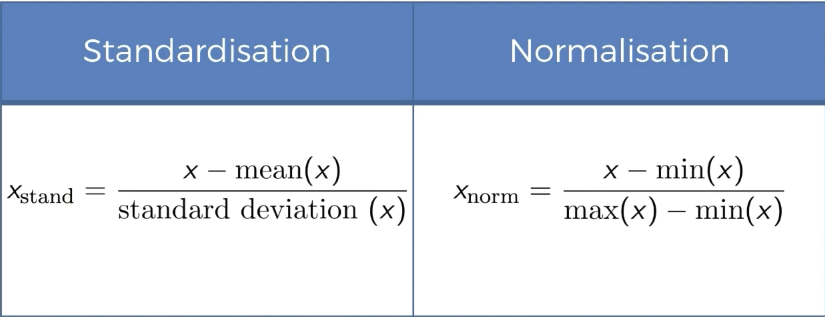

We are doing this because if variable's scale is highly different from each other, there will be problem for ML model. ML models are based on Euclidean distance which is √((x2 - x1)^2 + (y2 - y1)^2). So in coordination system, distance line between them will going to be distant. To prevent domination between them, we have to use feature scaling.

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Standardisation

X_train [:, 3:] = sc.fit_transform(X_train [:, 3:])
# fit_transform is only for training set

X_test [:, 3:] = sc.transform(X_test [:, 3:])
# transform uses the trained data and uses same mean and std, then transforms.

In [48]:
# FOR R

# training_set[, 2:3] = scale(training_set)
# test_set[, 2:3] = scale(test_set[, 2:3])

# We changed "Country" and "Purchased" by putting the categories
# as factors of the different levels and labels.
# And a factor in R is not a numeric number.
# When we apply the scale here, x must be numeric.
# That means, all the columns in x that is the training set must be numeric.
# So we eliminate to [, 2:3] -> Just the second and third columns

In [49]:
# FOR R

# Or, instead of using all these functions; we can simply use the data we need

# dataset = read.csv('Data.csv')
# dataset = sataset[, 2:3]

# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Purchased, SplitRatio = 0.8)

# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)


In [50]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [51]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
